## Decision Science Candidate Exercise
The Zillow Group Decision Science team is trying to settle a hotly contested debate inside the company.
Should Zillow’s New Construction sales team charge their customers a flat price per Community or per
Lead Received? *(A **Community** is a collection of homes owned by a builder. A **Lead** is a consumer
on Zillow who chooses to contact the builder about a specific community)*

It is January 2018 and Zillow current has 6,174 New Construction Communities advertising and delivers
an average of 4.00 Leads per Community per Month to existing customers.
The team is unified in agreeing on two key priorities:
1. Prioritizing long-term revenue opportunity over short-term.
2. Providing the best experience for the consumer possible (More listings is better)
3. They recommend the following pricing options:
    * \$40/Lead
    * \$400/Community/Month
    


## Problem Overview

You’ve already looked into market research which came back with the following interesting results:
* There are a total of 38,000 active New Construction communities in the United States today
* The median sale price of a New Construction home is \$350,000
* Of the final sale price, the industry spends on average 1.0% on marketing and yields an average
of 5% profit after expenses.

You’ve also asked the Financial Planning and Analysis team for some assistance and they provided you
with the following estimates:

* Leads per Community per Month are expected to grow at the following rates Month-Over-
Month:
    * 2018: 5% MoM growth every month
    * 2019: 4% MoM growth every month
    * 2020: 1% MoM growth every month
    
    
* Similarly, Zillow’s expected number of New Construction communities advertising on the
site is expected to grow at the following rates Month-Over-Month for the Pay Per Lead
model:
    * 2018: 6% MoM growth every month
    * 2019: 4% MoM growth every month
    * 2020: 2% MoM growth every month
    
    
* However, with the $400 Price Per Community their model believes that the Community
Month-Over-Month growth rate will be only 90% the rate of Price per Lead model as they
expect a higher cancellation rate. (For Example: 6%*0.9; 4%*0.9; and 2%*0.9)



## Data setup - FP&A estimates

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
##Global Variables 
leads = 4 ##4.00 per month
years = [2018, 2019, 2020]


## Leads Growth

In [2]:
growth_rate1 = [1.05, 1.04, 1.01] 

def leads_growth(leads, years, growth_rate):
    i = 0 
    dict_leads = {}
    dict_avg_leads = {}
    dict_gr = {}
    latest_lead = 0
    for yy in years:
        for m in range(1,13):
            yymm = str(yy) + '-' + str(m)
            dict_gr[yymm] = growth_rate[i]
            dict_avg_leads[yymm] = leads
            if yy==2018 and m==1:
                dict_leads[yymm]= leads * growth_rate[i]**(m-1)
            elif yy==2018 and m>=2:
                dict_leads[yymm]= leads * growth_rate[i]**(m-1)
                latest_lead = dict_leads[yymm]
            elif yy>2018:
                dict_leads[yymm]= latest_lead * growth_rate[i]**(m)
        latest_lead = dict_leads[yymm]
        i += 1
        df0 = pd.DataFrame.from_dict(dict_avg_leads, orient='index')
        df0 = df0.rename(columns={0:'avg_leads'})
        df1 = pd.DataFrame.from_dict(dict_gr, orient='index')
        df1 = df1.rename(columns={0:'lead_growth_rate'})
        df2 = pd.DataFrame.from_dict(dict_leads, orient='index')
        df2 = df2.rename(columns={0:'lead_growth'})
        df = pd.concat([df0, df1, df2], axis=1)
    return df


In [3]:
df_leads = leads_growth(4, years, growth_rate1)
df_leads

,avg_leads,lead_growth_rate,lead_growth
2018-1,4,1.05,4.000000
2018-2,4,1.05,4.200000
2018-3,4,1.05,4.410000
2018-4,4,1.05,4.630500
2018-5,4,1.05,4.862025
2018-6,4,1.05,5.105126
2018-7,4,1.05,5.360383
2018-8,4,1.05,5.628402
2018-9,4,1.05,5.909822
2018-10,4,1.05,6.205313


## Total Communities 

In [4]:
growth_rate_com1 = [1.06, 1.04, 1.02] 

def community_growth(starting_community_size, years, growth_rate):
    i = 0 
    dict_leads = {}
    dict_avg_leads = {}
    dict_gr = {}
    latest_community_size = 0 
    starting_community = starting_community_size

    for yy in years:
        for m in range(1,13):
            yymm = str(yy) + '-' + str(m)
            dict_gr[yymm] = growth_rate[i]
            dict_avg_leads[yymm] = starting_community_size 
            if yy==2018 and m==1:
                dict_leads[yymm]= starting_community * growth_rate[i]**(m-1)
            elif yy==2018 and m>=2:
                dict_leads[yymm]= starting_community * growth_rate[i]**(m-1)
                latest_latest_community_size = dict_leads[yymm]
            elif yy>2018:
                dict_leads[yymm]= latest_community_size * growth_rate[i]**(m)
        latest_community_size = dict_leads[yymm]
        i += 1
        df1 = pd.DataFrame.from_dict(dict_gr, orient='index')
        df1 = df1.rename(columns={0:'community_growth_rate'})
        df2 = pd.DataFrame.from_dict(dict_leads, orient='index')
        df2 = df2.rename(columns={0:'community_growth'})
        df = pd.concat([df1, df2], axis=1)
    return df

## Community Growth Rate for 2 Strategies

In [5]:
growth_rate_com1 = [1.06, 1.04, 1.02] 
community1 = community_growth(6174, years, growth_rate_com1)
community1 = community1.rename(columns={'community_growth_rate':'community_growth_rate1',
                                      'community_growth':'community_growth1'})
community1['community_growth1'] = round(community1['community_growth1'],2)

growth_rate_com2 = [1+0.06*0.9, 1+0.04*0.9, 1+0.02*0.9]
community2 = community_growth(6174, years, growth_rate_com2)
community2 = community2.rename(columns={'community_growth_rate':'community_growth_rate2',
                                      'community_growth':'community_growth2'})
community2['community_growth2'] = round(community2['community_growth2'],2)


df_communities = pd.concat([community1, community2], axis=1)
df_communities

,community_growth_rate1,community_growth1,community_growth_rate2,community_growth2
2018-1,1.06,6174.00,1.054,6174.00
2018-2,1.06,6544.44,1.054,6507.40
2018-3,1.06,6937.11,1.054,6858.80
2018-4,1.06,7353.33,1.054,7229.17
2018-5,1.06,7794.53,1.054,7619.55
2018-6,1.06,8262.20,1.054,8031.00
2018-7,1.06,8757.94,1.054,8464.68
2018-8,1.06,9283.41,1.054,8921.77
2018-9,1.06,9840.42,1.054,9403.54
2018-10,1.06,10430.84,1.054,9911.33


In [6]:
leads_community = pd.concat([df_leads, df_communities], axis = 1)
leads_community['total_growth_method1'] = leads_community['lead_growth'] + leads_community['community_growth1']
leads_community['total_growth_method2'] = leads_community['lead_growth'] + leads_community['community_growth2']


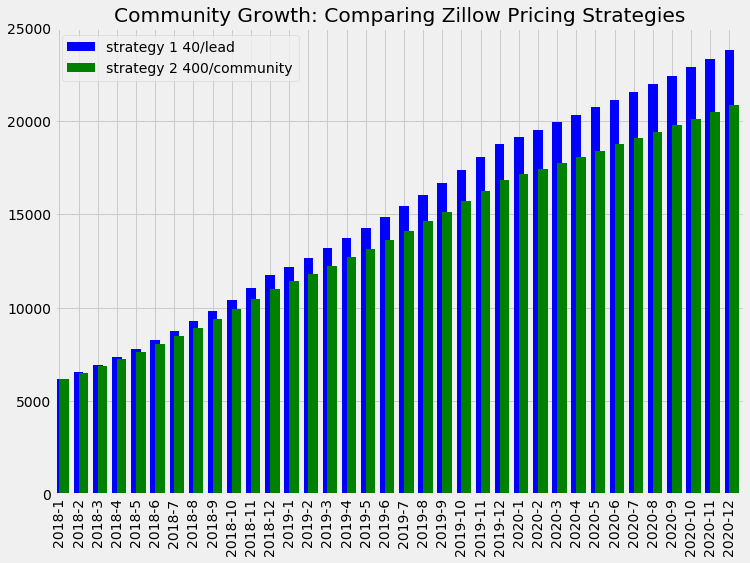

In [7]:
plt.style.use('fivethirtyeight')
leads_community['total_growth_method1'].plot.bar(align = 'center', label = 'strategy 1 40/lead', figsize = (11,8),color='blue', width = .5)
leads_community['total_growth_method2'].plot.bar(align='edge', label = 'strategy 2 400/community', color='green', width = .5)
plt.title('Community Growth: Comparing Zillow Pricing Strategies')
plt.legend()
plt.show()


## Q1. Total Community Size on December 2020

- ** Strategy 1** = \$40/Lead = 23809
- ** Strategy 2** = \$400/Community/Month = 20862


In [8]:
print(leads_community.loc['2020-12']['total_growth_method1'])
print(leads_community.loc['2020-12']['total_growth_method2'])


23809.952377858117
20862.232377858116


## Q2. Revenue Impact

Assumptions:

- **Strategy 1 Revenue per Month** = \$40 X Total Leads per Month X Total # of Communities
- **Strategy 2 Revenue per Month** = \$400 X Total # of Communities
    

In [9]:
leads_community['revenue_method1'] = leads_community['total_growth_method1'] * leads_community['lead_growth'] * 40
leads_community['revenue_method2'] = leads_community['total_growth_method2'] * 400
leads_community['rev1_cumulative'] = leads_community['revenue_method1'].cumsum()
leads_community['rev2_cumulative']= leads_community['revenue_method2'].cumsum()

print('Total Revenue Impact Method 1, $40/lead:  ' + str(leads_community['rev1_cumulative'][-1]))
print('Total Revenue Impact Method 2, $400/Community/Month:  ' + str(leads_community['rev2_cumulative'][-1]))


Total Revenue Impact Method 1, $40/lead:  209760744.02739576
Total Revenue Impact Method 2, $400/Community/Month:  198261688.3405595


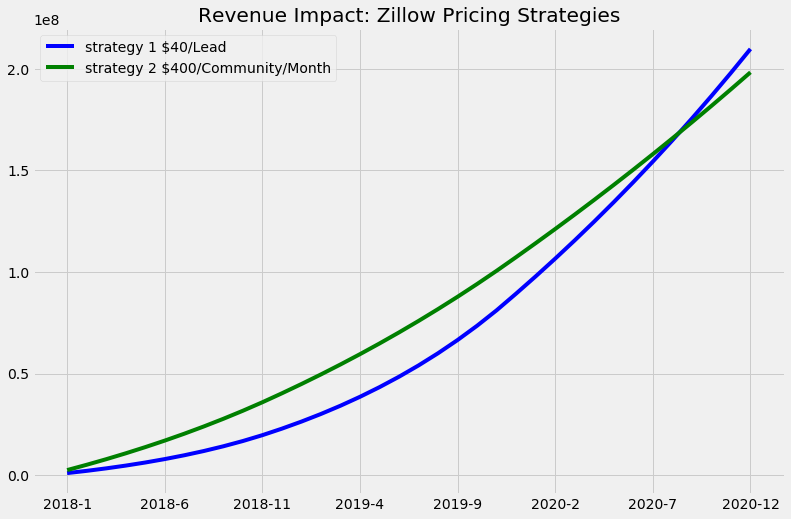

In [10]:
plt.style.use('fivethirtyeight')
leads_community['rev1_cumulative'].plot.line(label = 'strategy 1 $40/Lead', figsize = (12,8),color='blue')
leads_community['rev2_cumulative'].plot.line(label = 'strategy 2 $400/Community/Month', color='green')
plt.title('Revenue Impact: Zillow Pricing Strategies')
plt.legend()
plt.show()


In [11]:
leads_community['revenue_method1'] = leads_community['revenue_method1'].map('${:,.2f}'.format)
leads_community['revenue_method2'] = leads_community['revenue_method2'].map('${:,.2f}'.format)


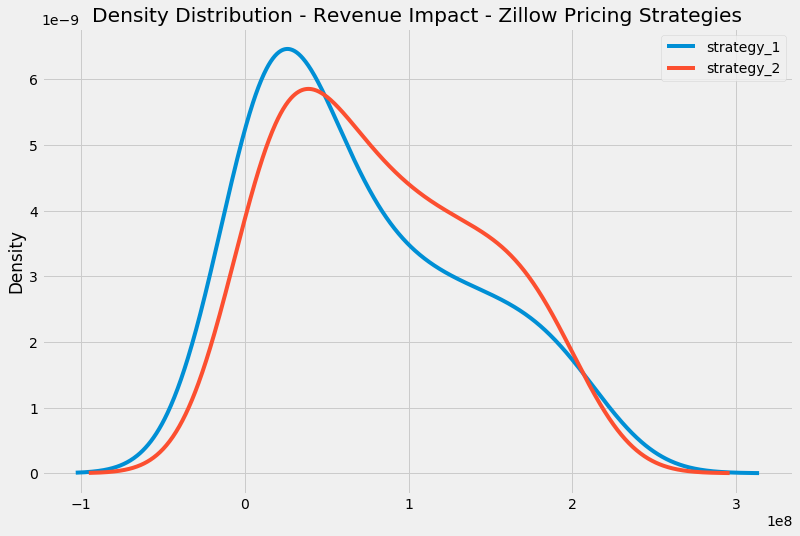

In [12]:
plt.style.use('fivethirtyeight')
leads_community['rev1_cumulative'].plot.kde(label = 'strategy_1', figsize = (12,8))
leads_community['rev2_cumulative'].plot.kde(label = 'strategy_2')
plt.title('Density Distribution - Revenue Impact - Zillow Pricing Strategies')
plt.legend()
plt.show()


In [13]:
leads_community['rev1_cumulative'] = leads_community['rev1_cumulative'].map('${:,.2f}'.format)
leads_community['rev2_cumulative'] = leads_community['rev2_cumulative'].map('${:,.2f}'.format)



In [14]:
leads_community.head()

,avg_leads,lead_growth_rate,lead_growth,community_growth_rate1,community_growth1,community_growth_rate2,community_growth2,total_growth_method1,total_growth_method2,revenue_method1,revenue_method2,rev1_cumulative,rev2_cumulative
2018-1,4,1.05,4.000000,1.06,6174.00,1.054,6174.00,6178.000000,6178.000000,"$988,480.00","$2,471,200.00","$988,480.00","$2,471,200.00"
2018-2,4,1.05,4.200000,1.06,6544.44,1.054,6507.40,6548.640000,6511.600000,"$1,100,171.52","$2,604,640.00","$2,088,651.52","$5,075,840.00"
2018-3,4,1.05,4.410000,1.06,6937.11,1.054,6858.80,6941.520000,6863.210000,"$1,224,484.13","$2,745,284.00","$3,313,135.65","$7,821,124.00"
2018-4,4,1.05,4.630500,1.06,7353.33,1.054,7229.17,7357.960500,7233.800500,"$1,362,841.44","$2,893,520.20","$4,675,977.09","$10,714,644.20"
2018-5,4,1.05,4.862025,1.06,7794.53,1.054,7619.55,7799.392025,7624.412025,"$1,516,833.56","$3,049,764.81","$6,192,810.65","$13,764,409.01"


In [15]:
leads_community[['avg_leads','lead_growth', 'total_growth_method1', 'total_growth_method2',
                 'revenue_method1','revenue_method2','rev1_cumulative','rev2_cumulative']]


,avg_leads,lead_growth,total_growth_method1,total_growth_method2,revenue_method1,revenue_method2,rev1_cumulative,rev2_cumulative
2018-1,4,4.000000,6178.000000,6178.000000,"$988,480.00","$2,471,200.00","$988,480.00","$2,471,200.00"
2018-2,4,4.200000,6548.640000,6511.600000,"$1,100,171.52","$2,604,640.00","$2,088,651.52","$5,075,840.00"
2018-3,4,4.410000,6941.520000,6863.210000,"$1,224,484.13","$2,745,284.00","$3,313,135.65","$7,821,124.00"
2018-4,4,4.630500,7357.960500,7233.800500,"$1,362,841.44","$2,893,520.20","$4,675,977.09","$10,714,644.20"
2018-5,4,4.862025,7799.392025,7624.412025,"$1,516,833.56","$3,049,764.81","$6,192,810.65","$13,764,409.01"
2018-6,4,5.105126,8267.305126,8036.105126,"$1,688,225.46","$3,214,442.05","$7,881,036.11","$16,978,851.06"
2018-7,4,5.360383,8763.300383,8470.040383,"$1,878,985.70","$3,388,016.15","$9,760,021.81","$20,366,867.21"
2018-8,4,5.628402,9289.038402,8927.398402,"$2,091,297.58","$3,570,959.36","$11,851,319.39","$23,937,826.57"
2018-9,4,5.909822,9846.329822,9409.449822,"$2,327,602.18","$3,763,779.93","$14,178,921.56","$27,701,606.50"
2018-10,4,6.205313,10437.045313,9917.535313,"$2,590,605.26","$3,967,014.13","$16,769,526.83","$31,668,620.63"
